In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import pickle

In [2]:
train = pd.read_csv("F:/Projects/front end projects/SMBAIML2/Data/Training.csv")
test = pd.read_csv("F:/Projects/front end projects/SMBAIML2/Data/Testing.csv")

In [3]:
train.drop("Unnamed: 133",axis = 1, inplace = True)

In [4]:
train.drop('fluid_overload',axis = 1, inplace = True)

In [5]:
train.drop(['weight_gain','cold_hands_and_feets','anxiety','irregular_sugar_level',
           'yellow_urine','acute_liver_failure','swelling_of_stomach',
           'drying_and_tingling_lips','continuous_feel_of_urine',
          'internal_itching','polyuria','mood_swings','receiving_unsterile_injections',
          'stomach_bleeding','prominent_veins_on_calf','loss_of_smell','throat_irritation',
          'redness_of_eyes','sinus_pressure','runny_nose','pain_during_bowel_movements',
          'pain_in_anal_region','cramps','bruising','enlarged_thyroid','brittle_nails',
          'swollen_extremeties','slurred_speech','distention_of_abdomen','fluid_overload.1',
          'skin_peeling','silver_like_dusting','small_dents_in_nails','blister',
          'red_sore_around_nose','bloody_stool','swollen_blood_vessels','hip_joint_pain',
          'painful_walking','spinning_movements','altered_sensorium','toxic_look_(typhos)'],axis =1, inplace = True)

In [6]:
train[(train['itching'] == 1) & (train['stomach_pain'] == 1)]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,pus_filled_pimples,blackheads,scurring,inflammatory_nails,yellow_crust_ooze,prognosis
40,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
41,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
43,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
44,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
46,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4719,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4760,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4801,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4842,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


Text(0.5, 1.0, 'Importance of Itching symptom to determine Fungal Infection')

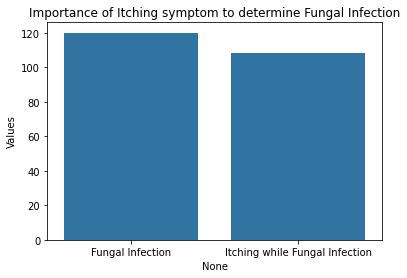

In [7]:
a = len(train[train['prognosis'] == 'Fungal infection'])
b = len(train[(train['itching'] == 1) & (train['prognosis'] == 'Fungal infection')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Fungal Infection','Itching while Fungal Infection'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of Itching symptom to determine Fungal Infection')

Text(0.5, 1.0, 'Importance of High Fever symptom to determine Jaundice')

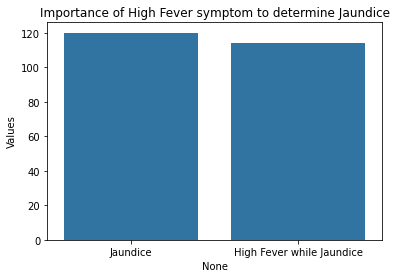

In [8]:
a = len(train[train['prognosis'] == 'Jaundice'])
b = len(train[(train['high_fever'] == 1) & (train['prognosis'] == 'Jaundice')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Jaundice','High Fever while Jaundice'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of High Fever symptom to determine Jaundice')

Text(0.5, 1.0, 'Importance of Yellowing of Eyes symptom to determine Tuberculosis')

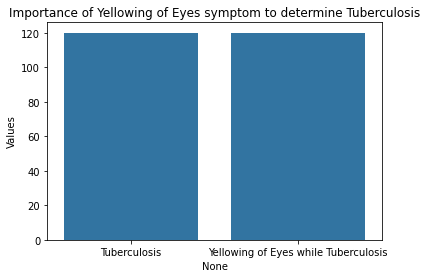

In [31]:

a = len(train[train['prognosis'] == 'Tuberculosis'])
b = len(train[(train['yellowing_of_eyes'] == 1) & (train['prognosis'] == 'Tuberculosis')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Tuberculosis','Yellowing of Eyes while Tuberculosis'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of Yellowing of Eyes symptom to determine Tuberculosis')

Text(0.5, 1.0, 'Importance of History of Consumption symptom to determine Alcoholic hepatitis')

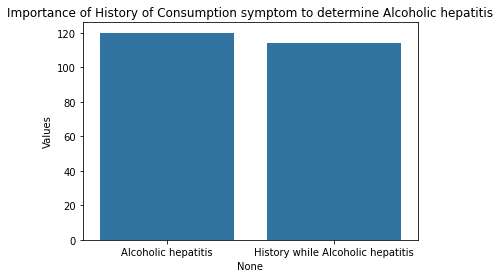

In [9]:

a = len(train[train['prognosis'] == 'Alcoholic hepatitis'])
b = len(train[(train['history_of_alcohol_consumption'] == 1) & (train['prognosis'] == 'Alcoholic hepatitis')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Alcoholic hepatitis','History while Alcoholic hepatitis'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of History of Consumption symptom to determine Alcoholic hepatitis')

In [10]:
a = train[train['prognosis'] == 'Tuberculosis']
a.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,pus_filled_pimples,blackheads,scurring,inflammatory_nails,yellow_crust_ooze,prognosis
250,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
251,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
252,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
253,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
254,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis


In [11]:
def data_preprocessing(data):
    data.drop(['fluid_overload','weight_gain','cold_hands_and_feets','anxiety','irregular_sugar_level',
           'yellow_urine','acute_liver_failure','swelling_of_stomach',
           'drying_and_tingling_lips','continuous_feel_of_urine',
          'internal_itching','polyuria','mood_swings','receiving_unsterile_injections',
          'stomach_bleeding','prominent_veins_on_calf','loss_of_smell','throat_irritation',
          'redness_of_eyes','sinus_pressure','runny_nose','pain_during_bowel_movements',
          'pain_in_anal_region','cramps','bruising','enlarged_thyroid','brittle_nails',
          'swollen_extremeties','slurred_speech','distention_of_abdomen','fluid_overload.1',
          'skin_peeling','silver_like_dusting','small_dents_in_nails','blister',
          'red_sore_around_nose','bloody_stool','swollen_blood_vessels','hip_joint_pain',
          'painful_walking','spinning_movements','altered_sensorium','toxic_look_(typhos)'],axis =1, inplace = True)
    return data

In [12]:
X = train.drop('prognosis',axis = 1)
y = train.prognosis

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)

In [14]:
test = data_preprocessing(test)

In [15]:
X_test = test.drop('prognosis',axis = 1)
y_test = test.prognosis

In [16]:
def model_evaluation(classifier):
    y_pred = classifier.predict(X_val)
    yt_pred = classifier.predict(X_train)
    y_pred1 = classifier.predict(X_test)
    print('The Training Accuracy of the algorithm is ', accuracy_score(y_train, yt_pred))
    print('The Validation Accuracy of the algorithm is ', accuracy_score(y_val, y_pred))
    print('The Testing Accuracy of the algorithm is', accuracy_score(y_test, y_pred1))
    return [(accuracy_score(y_train, yt_pred)), (accuracy_score(y_val, y_pred)), (accuracy_score(y_test, y_pred1))]

In [17]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [18]:
knn_results = model_evaluation(knn)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 1.0


In [19]:
svm = SVC(C=1)
svm.fit(X_train, y_train)

SVC(C=1)

In [20]:
svm_results = model_evaluation(svm)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 1.0


In [21]:
dtc = DecisionTreeClassifier(max_features= 10)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_features=10)

In [22]:
dtc_results = model_evaluation(dtc)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 0.9761904761904762


In [23]:
rfc = RandomForestClassifier(max_depth = 13)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=13)

In [24]:
rfc_results = model_evaluation(rfc)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 0.9761904761904762


In [25]:
results = pd.DataFrame(data = [knn_results, svm_results, dtc_results, rfc_results],
                      columns= ['Training Accuracy','Validation Accuracy', 'Testing Accuracy'],
                      index = ['K Nearest Neighbors Classifier','Support Vector Machines',
                               'Decision Trees Classifier', 'Random Forest Classifier'])

In [26]:
results

,Training Accuracy,Validation Accuracy,Testing Accuracy
K Nearest Neighbors Classifier,1.0,1.0,1.00000
Support Vector Machines,1.0,1.0,1.00000
Decision Trees Classifier,1.0,1.0,0.97619
Random Forest Classifier,1.0,1.0,0.97619


In [27]:
a = rfc.feature_importances_

In [28]:
col = X.columns

In [29]:
feat_imp = {}
for i, j in zip(a,col):
    feat_imp[j] = i

In [30]:
feat_imp

{'itching': 0.01302969071278974,
 'skin_rash': 0.005154590977632439,
 'nodal_skin_eruptions': 0.008051748176545394,
 'continuous_sneezing': 0.0032017998578906235,
 'shivering': 0.008024541399878038,
 'chills': 0.006140162334094935,
 'joint_pain': 0.013324447116872964,
 'stomach_pain': 0.00601021163699914,
 'acidity': 0.003630666542074152,
 'ulcers_on_tongue': 0.006519677613502203,
 'muscle_wasting': 0.0016315661929302472,
 'vomiting': 0.013731098986700507,
 'burning_micturition': 0.0031816401593529726,
 'spotting_ urination': 0.008043226354506624,
 'fatigue': 0.013249296003877654,
 'weight_loss': 0.013560682697563413,
 'restlessness': 0.004671233170386111,
 'lethargy': 0.011518771845063829,
 'patches_in_throat': 0.00418511574676675,
 'cough': 0.006302006453102812,
 'high_fever': 0.016455026142595315,
 'sunken_eyes': 0.01021563439662912,
 'breathlessness': 0.005896425812033796,
 'sweating': 0.014371762113973162,
 'dehydration': 0.007010960552660951,
 'indigestion': 0.006887402626724964,

In [31]:
def model_evaluation1(n_feat,classifier):
    y_pred = classifier.predict(X1_val)
    yt_pred = classifier.predict(X1_train)
    y_pred1 = classifier.predict(X1_test)
    return [(n_feat),(accuracy_score(y1_train, yt_pred)), (accuracy_score(y1_test, y_pred1))]

In [32]:
rfc_results = []
knn_results = []

In [33]:
for main in [0.020,0.018,0.016,0.014,0.012,0.01,0.008]:
    to_drop = []
    for i,j in zip(feat_imp.keys(),feat_imp.values()):
        if j < main:
            to_drop.append(i)
    
    X_new = X.drop(to_drop,axis = 1)
    y_new = y
    X1_train, X1_val, y1_train, y1_val = train_test_split(X_new, y_new, test_size=0.2)
    X1_test = X_test.drop(to_drop,axis = 1)
    y1_test = y_test
    rfc_new = RandomForestClassifier()
    rfc_new.fit(X1_train, y1_train)
    temp1 = model_evaluation1(X1_train.shape[1], rfc_new)
    rfc_results.append(temp1)
    knn_new = KNeighborsClassifier()
    knn_new.fit(X1_train, y1_train)
    temp2 = model_evaluation1(X1_train.shape[1],knn_new)
    knn_results.append(temp2)

In [34]:
randomf = pd.DataFrame(data = rfc_results,columns=['Number of features','Training Accuracy','Testing Accuracy'])

In [35]:
randomf

,Number of features,Training Accuracy,Testing Accuracy
0,8,0.269309,0.261905
1,13,0.409299,0.404762
2,17,0.551575,0.547619
3,23,0.627795,0.619048
4,35,0.835874,0.833333
5,45,0.910315,0.904762
6,61,0.989329,0.976190


In [36]:
knn_table = pd.DataFrame(data = knn_results,columns=['Number of features','Training Accuracy','Testing Accuracy'])

In [37]:
knn_table

,Number of features,Training Accuracy,Testing Accuracy
0,8,0.265752,0.261905
1,13,0.405742,0.428571
2,17,0.545986,0.547619
3,23,0.625762,0.619048
4,35,0.835874,0.833333
5,45,0.907012,0.928571
6,61,0.989329,0.976190


In [38]:
to_drop = []
for i,j in zip(feat_imp.keys(),feat_imp.values()):
    if j < 0.01:
        to_drop.append(i)

In [39]:
len(to_drop)

44

In [40]:
X_new = X.drop(to_drop,axis = 1)
y_new = y

In [41]:
X_new.head()

,itching,joint_pain,vomiting,fatigue,weight_loss,lethargy,high_fever,sunken_eyes,sweating,yellowish_skin,...,family_history,rusty_sputum,lack_of_concentration,receiving_blood_transfusion,coma,blood_in_sputum,palpitations,blackheads,inflammatory_nails,yellow_crust_ooze
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X_new, y_new, test_size=0.2)
X1_test = X_test.drop(to_drop,axis = 1)
y1_test = y_test

In [43]:
rfc_new = RandomForestClassifier()
rfc_new.fit(X1_train, y1_train)

RandomForestClassifier()

In [44]:
y_pred = rfc_new.predict(X1_val)
yt_pred = rfc_new.predict(X1_train)
y_pred1 = rfc_new.predict(X1_test)
print('The Training Accuracy of the algorithm is ', accuracy_score(y1_train, yt_pred))
print('The Validation Accuracy of the algorithm is ', accuracy_score(y1_val, y_pred))
print('The Testing Accuracy of the algorithm is', accuracy_score(y1_test, y_pred1))

The Training Accuracy of the algorithm is  0.9136178861788617
The Validation Accuracy of the algorithm is  0.8882113821138211
The Testing Accuracy of the algorithm is 0.9047619047619048


In [45]:
knn_new = KNeighborsClassifier()
knn_new.fit(X1_train, y1_train)

KNeighborsClassifier()

In [46]:
y_pred = knn_new.predict(X1_val)
yt_pred = knn_new.predict(X1_train)
y_pred1 = knn_new.predict(X1_test)
print('The Training Accuracy of the algorithm is ', accuracy_score(y1_train, yt_pred))
print('The Validation Accuracy of the algorithm is ', accuracy_score(y1_val, y_pred))
print('The Testing Accuracy of the algorithm is', accuracy_score(y1_test, y_pred1))

The Training Accuracy of the algorithm is  0.9108231707317073
The Validation Accuracy of the algorithm is  0.899390243902439
The Testing Accuracy of the algorithm is 0.9047619047619048


In [47]:
test.join(pd.DataFrame(y_pred1,columns=["predicted"]))[["prognosis","predicted"]]

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Fungal infection
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


In [48]:
X1_train.sum(axis = 1).max()

11

In [49]:
X1_train.columns

Index(['itching', 'joint_pain', 'vomiting', 'fatigue', 'weight_loss',
       'lethargy', 'high_fever', 'sunken_eyes', 'sweating', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellowing_of_eyes', 'malaise', 'phlegm', 'congestion',
       'irritation_in_anus', 'neck_pain', 'dizziness', 'puffy_face_and_eyes',
       'unsteadiness', 'bladder_discomfort', 'passage_of_gases', 'depression',
       'muscle_pain', 'red_spots_over_body', 'belly_pain',
       'abnormal_menstruation', 'increased_appetite', 'family_history',
       'rusty_sputum', 'lack_of_concentration', 'receiving_blood_transfusion',
       'coma', 'blood_in_sputum', 'palpitations', 'blackheads',
       'inflammatory_nails', 'yellow_crust_ooze'],
      dtype='object')

In [50]:
pickle.dump(knn_new, open('model.pkl','wb'))